# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [30]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [31]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [32]:
stats1 = pd.crosstab(df['sex'], df['flag_doente'], margins=True)

stats1


flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [33]:
stats1['media_doentes'] = stats1[1]/stats1['All']

stats1


flag_doente,0,1,All,media_doentes
sex,,,,
0.0,72,25,97,0.257732
1.0,92,114,206,0.553398
All,164,139,303,0.458746


In [34]:
stats1['Odds'] = stats1[1]/stats1[0]

stats1

flag_doente,0,1,All,media_doentes,Odds
sex,,,,,
0.0,72,25,97,0.257732,0.347222
1.0,92,114,206,0.553398,1.239130
All,164,139,303,0.458746,0.847561


In [35]:
stats1['Odds_ratio'] = stats1['Odds']/stats1.loc['All', 'Odds']

stats1

flag_doente,0,1,All,media_doentes,Odds,Odds_ratio
sex,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672
1.0,92,114,206,0.553398,1.239130,1.461996
All,164,139,303,0.458746,0.847561,1.000000


In [36]:
stats1['log_odds'] = np.log(stats1['Odds'])

stats1

flag_doente,0,1,All,media_doentes,Odds,Odds_ratio,log_odds
sex,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410
All,164,139,303,0.458746,0.847561,1.000000,-0.165392


In [37]:
stats1['WOE'] = np.log(stats1['Odds_ratio'])

stats1

flag_doente,0,1,All,media_doentes,Odds,Odds_ratio,log_odds,WOE
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [38]:
df['age_group'] = pd.qcut(df['age'], q=5, labels=['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5'])

table = pd.crosstab(df['age_group'], df['flag_doente'], margins=True)

table


flag_doente,0,1,All
age_group,,,
Grupo 1,47,16,63
Grupo 2,42,22,64
Grupo 3,32,39,71
Grupo 4,13,32,45
Grupo 5,30,30,60
All,164,139,303


In [39]:
table['media_doentes'] = table[1]/table['All']

table

flag_doente,0,1,All,media_doentes
age_group,,,,
Grupo 1,47,16,63,0.253968
Grupo 2,42,22,64,0.343750
Grupo 3,32,39,71,0.549296
Grupo 4,13,32,45,0.711111
Grupo 5,30,30,60,0.500000
All,164,139,303,0.458746


In [40]:
table['Odds'] = table[1]/table[0]

table

flag_doente,0,1,All,media_doentes,Odds
age_group,,,,,
Grupo 1,47,16,63,0.253968,0.340426
Grupo 2,42,22,64,0.343750,0.523810
Grupo 3,32,39,71,0.549296,1.218750
Grupo 4,13,32,45,0.711111,2.461538
Grupo 5,30,30,60,0.500000,1.000000
All,164,139,303,0.458746,0.847561


In [41]:
table['Odds_ratio'] = table['Odds']/table.loc['All', 'Odds']

table

flag_doente,0,1,All,media_doentes,Odds,Odds_ratio
age_group,,,,,,
Grupo 1,47,16,63,0.253968,0.340426,0.401653
Grupo 2,42,22,64,0.343750,0.523810,0.618020
Grupo 3,32,39,71,0.549296,1.218750,1.437950
Grupo 4,13,32,45,0.711111,2.461538,2.904261
Grupo 5,30,30,60,0.500000,1.000000,1.179856
All,164,139,303,0.458746,0.847561,1.000000


In [42]:
table['log_odds'] = np.log(table['Odds'])

table

flag_doente,0,1,All,media_doentes,Odds,Odds_ratio,log_odds
age_group,,,,,,,
Grupo 1,47,16,63,0.253968,0.340426,0.401653,-1.077559
Grupo 2,42,22,64,0.343750,0.523810,0.618020,-0.646627
Grupo 3,32,39,71,0.549296,1.218750,1.437950,0.197826
Grupo 4,13,32,45,0.711111,2.461538,2.904261,0.900787
Grupo 5,30,30,60,0.500000,1.000000,1.179856,0.000000
All,164,139,303,0.458746,0.847561,1.000000,-0.165392


In [43]:
table['WOE'] = np.log(table['Odds_ratio'])

3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

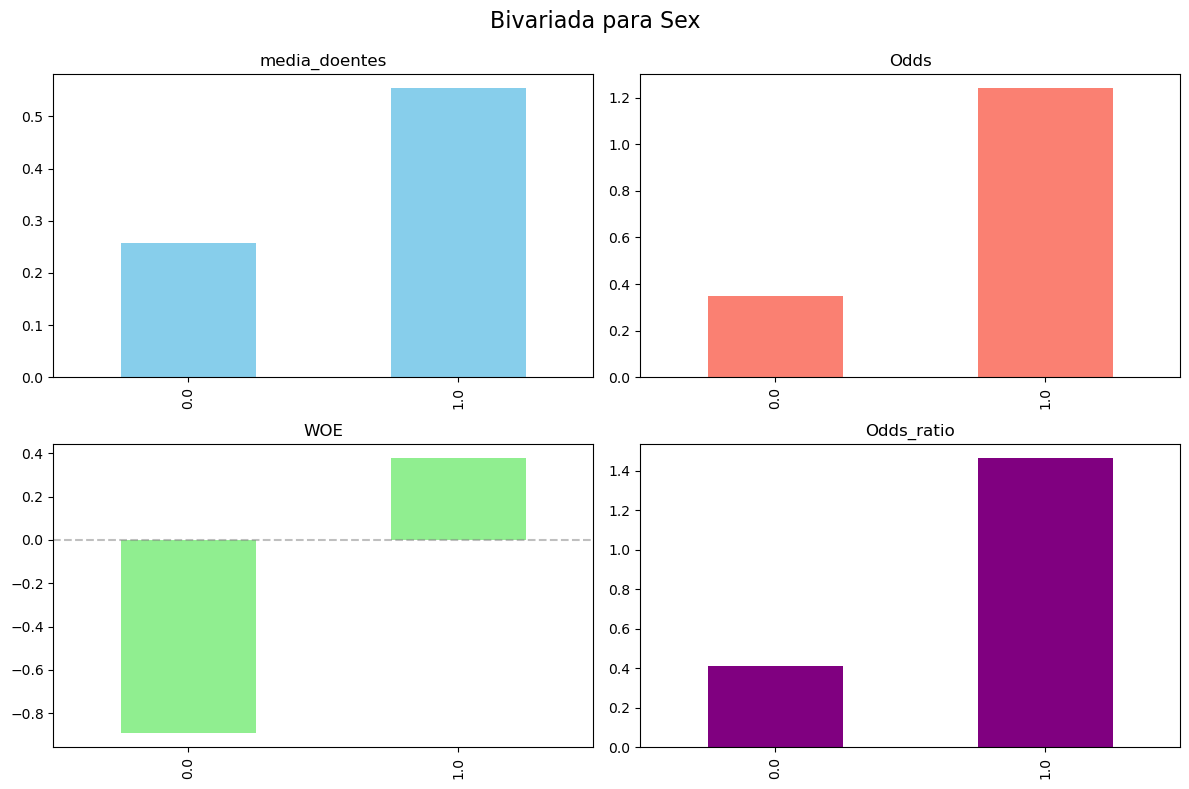

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Bivariada para Sex', fontsize=16)

metricas = ['media_doentes', 'Odds', 'WOE', 'Odds_ratio']
cores = ['skyblue', 'salmon', 'lightgreen', 'purple']

for i, (metrica, cor, ax) in enumerate(zip(metricas, cores, axes.flatten())):
    
    stats1[metrica].iloc[:-1].plot(kind= 'bar', ax= ax,  color= cor)
    ax.set_title(metrica)
    ax.set_xlabel('')
    
    if metrica == 'WOE':
        ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

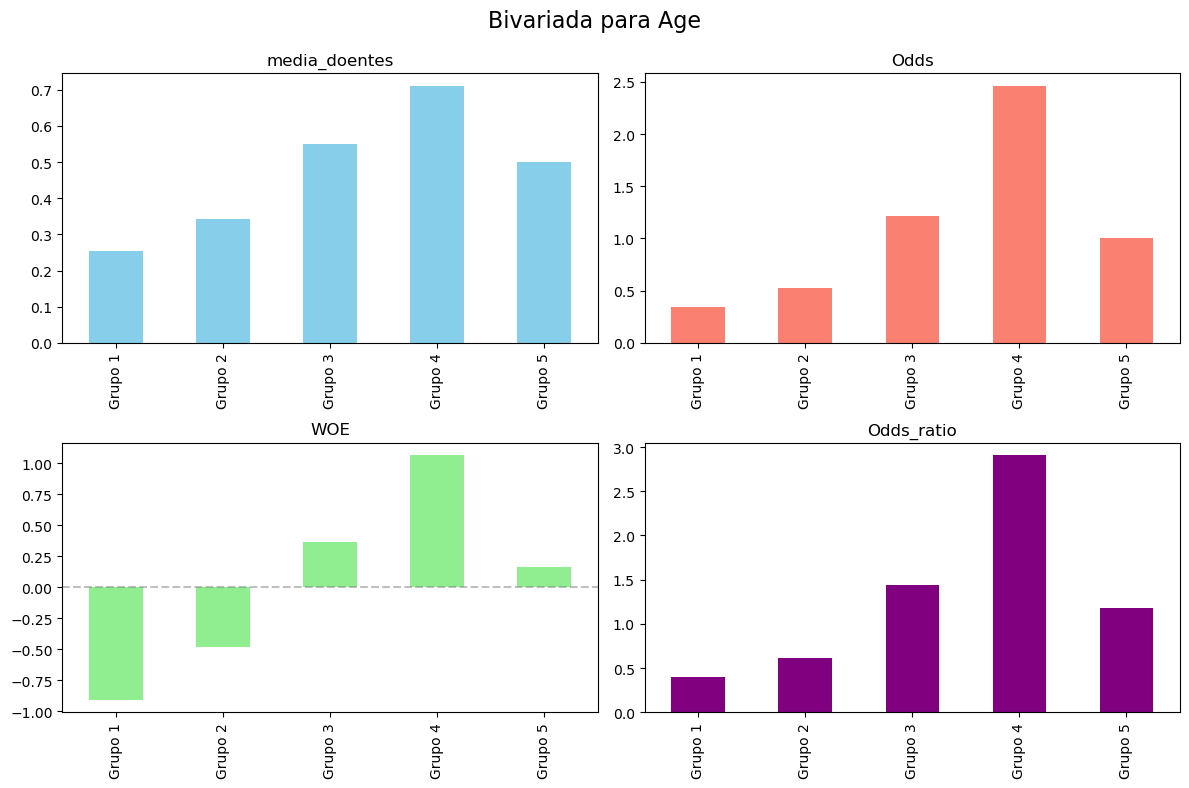

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Bivariada para Age', fontsize=16)

metricas = ['media_doentes', 'Odds', 'WOE', 'Odds_ratio']
cores = ['skyblue', 'salmon', 'lightgreen', 'purple']

for i, (metrica, cor, ax) in enumerate(zip(metricas, cores, axes.flatten())):
    
    table[metrica].iloc[:-1].plot(kind= 'bar', ax= ax,  color= cor)
    ax.set_title(metrica)
    ax.set_xlabel('')
    
    if metrica == 'WOE':
        ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()